# **성능관리_종합실습**

## **(1) 환경준비**

### **1) 라이브러리 불러오기**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

from keras.datasets import fashion_mnist

### **2) 함수만들기**

In [23]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### **3) 데이터 로딩**

In [24]:
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

rd.seed(20)
tr_id = rd.sample(range(60000), 4000)
va_id = rd.sample(range(10000), 1000)

x_train, y_train = x_train[tr_id], y_train[tr_id]
x_val, y_val = x_val[va_id], y_val[va_id]

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **4) 데이터 둘러보기**

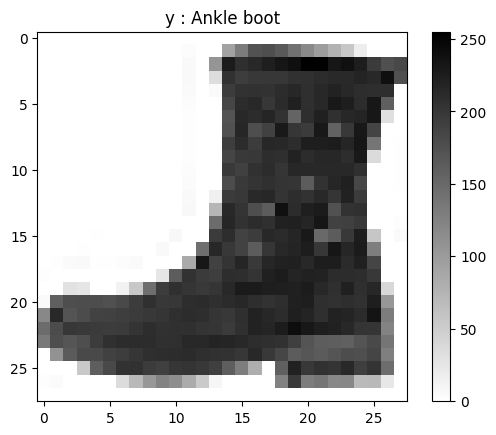

In [26]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1
i = y_val[n]

plt.imshow(x_val[n], cmap=plt.cm.binary)
plt.title(f'y : {class_names[i]}')
plt.colorbar()
plt.show()

## **(2) 데이터준비**

### 1) 데이터 2차원으로 펼치기

In [27]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4000, 28, 28), (4000,), (1000, 28, 28), (1000,))

In [28]:
# 펼치기
x_train = x_train.reshape(4000, -1)
x_val = x_val.reshape(1000, -1)

In [29]:
x_train.shape, x_val.shape

((4000, 784), (1000, 784))

### 2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_val를 그냥 255로 나누면 됨

In [30]:
x_train = x_train / 255.
x_val = x_val / 255.

## (3) 모델링

* 히든레이어의 노드를 다음과 같이 구성합니다.
    * 128, 64, 32, 16, 10
* epoch : 50 ~
* learning_rate : 0.01 ~ 0.0001


### 1) 모델1 : 과적합 모델
* 위에서 제시한 구조대로 모델을 설계하고 학습합니다.

#### ① 모델설계

In [36]:
nfeatures = x_train.shape[1]

clear_session()

model1 = Sequential([Input(shape = (nfeatures, )),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

#### ② 학습

In [37]:
model1.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy')

In [38]:
history = model1.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7881 - val_loss: 0.9448
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8222 - val_loss: 0.6476
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6807 - val_loss: 0.6192
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5416 - val_loss: 0.5580
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4935 - val_loss: 0.5315
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4249 - val_loss: 0.5412
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4071 - val_loss: 0.5004
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3738 - val_loss: 0.4874
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3360 - val_loss: 0.4732
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3386 - val_loss: 0.4771
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2826 - val_loss: 0.5079
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

#### ③ 예측 및 검증평가

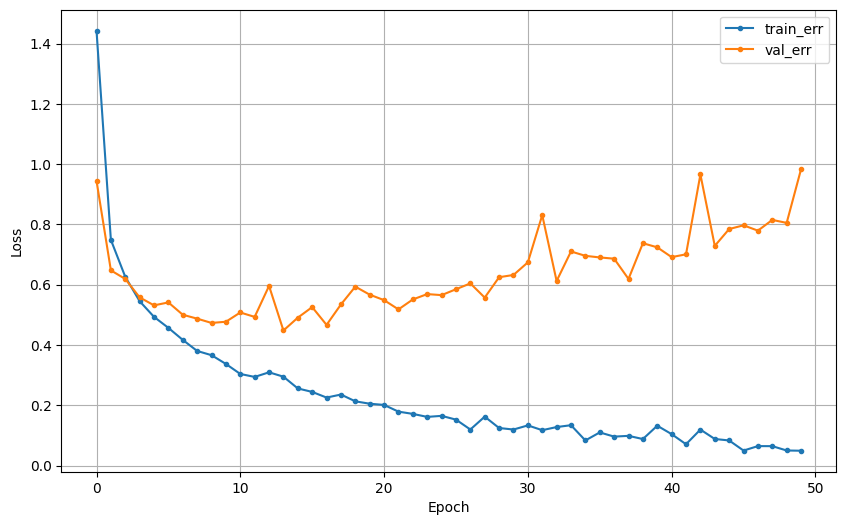

In [39]:
dl_history_plot(history)

In [40]:
# 예측
pred = model1.predict(x_val)
pred1 = pred.argmax(axis=1)
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ 81   0   1   3   0   0  13   0   1   0]
 [  1 101   0   3   0   0   1   0   0   0]
 [  3   0  45   0  12   0  26   0   1   0]
 [  5   2   2  86   4   0   5   0   0   0]
 [  2   0   6   9  62   0  18   0   2   0]
 [  0   0   0   0   0  85   0   2   0   5]
 [ 14   1   2   3   8   0  64   0   1   0]
 [  0   0   0   0   0   2   0  78   0  13]
 [  2   0   0   2   1   0   3   1  89   0]
 [  0   0   0   0   0   0   0   6   0 123]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.97      0.95      0.96       106
           2       0.80      0.52      0.63        87
           3       0.81      0.83      0.82       104
           4       0.71      0.63      0.67        99
           5       0.98      0.92      0.95        92
           6       0.49      0.69      0.57        93
           7       0.90      0.84      0.87        93
           8       0.95      0.91      0.93

### 2) early stopping
* 모델1에 대해서, early stopping으로 과적합을 예방해 봅시다.

#### ① 모델설계

In [42]:
nfeatures = x_train.shape[1]

clear_session()

model2 = Sequential([Input(shape = (nfeatures, )),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

#### ② 학습

In [43]:
model2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy')

In [44]:
# EarlyStopping 설정 ------------------
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5)

In [45]:
history2 = model2.fit(x_train, y_train, epochs = 50, validation_split = .2, callbacks = [es]).history

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.5132 - val_loss: 0.7426
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7185 - val_loss: 0.5916
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5770 - val_loss: 0.5835
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5305 - val_loss: 0.5343
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4668 - val_loss: 0.5231
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4092 - val_loss: 0.5161
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4272 - val_loss: 0.5295
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3874 - val_loss: 0.5512
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3748 - val_loss: 0.4965
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2992 - val_loss: 0.5187
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2900 - val_loss: 0.5361
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

#### ③ 예측 및 검증평가

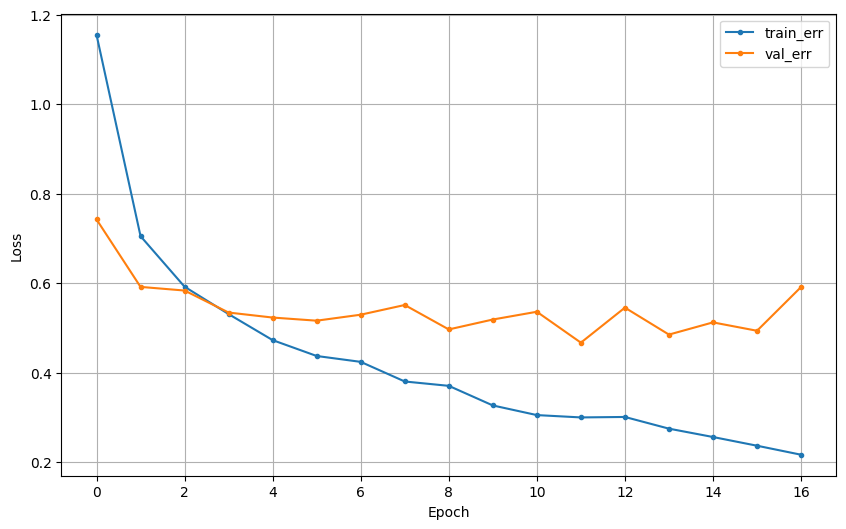

In [46]:
dl_history_plot(history2)

In [48]:
# 예측
pred2 = model2.predict(x_val)
pred2_1 = pred2.argmax(axis=1)
print(confusion_matrix(y_val, pred2_1))
print(classification_report(y_val, pred2_1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
[[ 73   0   2   1   0   0  19   0   4   0]
 [  3 102   0   1   0   0   0   0   0   0]
 [  1   0  74   1   3   0   7   0   1   0]
 [  4   1   3  89   5   0   2   0   0   0]
 [  1   0  25  10  38   0  22   0   3   0]
 [  0   0   0   0   0  82   0   6   0   4]
 [ 11   0   6   4   4   0  66   0   2   0]
 [  0   0   0   0   0   1   0  92   0   0]
 [  0   0   0   1   1   0   3   0  93   0]
 [  0   0   0   0   0   2   0  35   0  92]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.99      0.96      0.98       106
           2       0.67      0.85      0.75        87
           3       0.83      0.86      0.84       104
           4       0.75      0.38      0.51        99
           5       0.96      0.89      0.93        92
           6       0.55      0.71      0.62        93
           7       0.69      0.99      0.81        93
           8       0.90      0.95      0.9

### 3) Dropout
* 모델1에 대해서, Dropout으로 과적합을 방지해 봅시다.

#### ① 모델설계

In [49]:
nfeatures = x_train.shape[1]

clear_session()

model3 = Sequential([Input(shape = (nfeatures, )),

                    Dense(128, activation = 'relu'),
                    Dropout(0.3),
                    Dense(64, activation = 'relu'),
                    Dropout(0.3),
                    Dense(32, activation = 'relu'),
                    Dropout(0.3),
                    Dense(16, activation = 'relu'),
                    Dropout(0.3),
                    Dense(10, activation = 'relu'),
                    Dropout(0.3),
                    Dense(10, activation = 'softmax')])

model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,624 (436.03 KB)

 Trainable params: 111,624 (436.03 KB)

 Non-trainable params: 0 (0.00 B)

#### ② 학습

In [50]:
# 컴파일
model3.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

In [51]:
# 학습
result3 = model3.fit(x_train, y_train, epochs = 100, validation_split=0.2).history

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.2982 - val_loss: 2.0064
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0832 - val_loss: 1.6167
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8458 - val_loss: 1.4185
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7251 - val_loss: 1.2970
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6512 - val_loss: 1.2096
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5288 - val_loss: 1.1200
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4507 - val_loss: 1.0671
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3968 - val_loss: 1.0272
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3741 - val_loss: 1.0046
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2864 - val_loss: 0.9540
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2163 - val_loss: 0.9734
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━

#### ③ 예측 및 검증평가

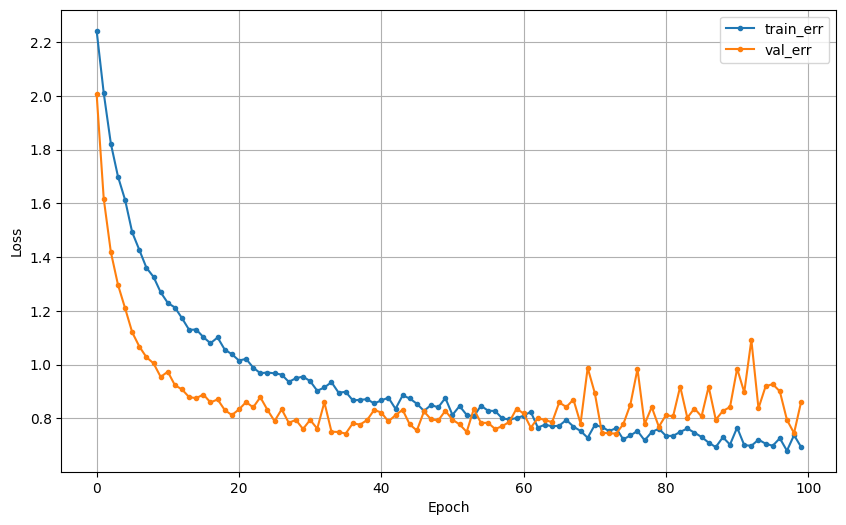

In [52]:
# 학습곡선
dl_history_plot(result3)

In [53]:
# 예측
pred2 = model2.predict(x_val)
pred2_1 = pred2.argmax(axis=1)
print(confusion_matrix(y_val, pred2_1))
print(classification_report(y_val, pred2_1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 73   0   2   1   0   0  19   0   4   0]
 [  3 102   0   1   0   0   0   0   0   0]
 [  1   0  74   1   3   0   7   0   1   0]
 [  4   1   3  89   5   0   2   0   0   0]
 [  1   0  25  10  38   0  22   0   3   0]
 [  0   0   0   0   0  82   0   6   0   4]
 [ 11   0   6   4   4   0  66   0   2   0]
 [  0   0   0   0   0   1   0  92   0   0]
 [  0   0   0   1   1   0   3   0  93   0]
 [  0   0   0   0   0   2   0  35   0  92]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.99      0.96      0.98       106
           2       0.67      0.85      0.75        87
           3       0.83      0.86      0.84       104
           4       0.75      0.38      0.51        99
           5       0.96      0.89      0.93        92
           6       0.55      0.71      0.62        93
           7       0.69      0.99      0.81        93
           8       0.90      0.95      0.93